<a href="https://colab.research.google.com/github/ImVis10/1PercentStrategy/blob/master/1PercentStrategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv  
import time
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
API_KEY = 'OTPBXZ24V7Q9A24S'

In [3]:
def write_to_csv(stock,data, mode):
  # header = ['time', 'open', 'high', 'low', 'close', 'volume']
  with open("data/"+stock+'_minute.csv', mode, encoding='UTF8') as f:
      writer = csv.writer(f)
      writer.writerow(data)

In [4]:
time_periods ={
    '1':'year1month1',
    '2':'year1month2',
    '3':'year1month3',
    '4':'year1month4',
    '5':'year1month5',
    '6':'year1month6',
    '7':'year1month7',
    '8':'year1month8',
    '9':'year1month9',
    '10':'year1month10',
    '11':'year1month11',
    '12':'year1month12',
    '13':'year2month1',
    '14':'year2month2',
    '15':'year2month3',
    '16':'year2month4',
    '17':'year2month5',
    '18':'year2month6',
    '19':'year2month7',
    '20':'year2month8',
    '21':'year2month9',
    '22':'year2month10',
    '23':'year2month11',
    '24':'year2month12',
}

In [34]:
stocks = ['AMZN', 'NVDA', 'META', 'SBUX', 'CLFD', 'PG', 'SHOP', 'AMD']

In [5]:
import csv
import requests

def get_stock_csv(stock_name):
  # Run only 5 time periods in a minute to not exceed the API hits
  num_calls_in_a_minute = 0
  max_calls_in_a_minute = 5
  for month, time_period in time_periods.items():
    CSV_URL = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol=%(stock)s&interval=1min&slice=%(slice)s&apikey=%(key)s&adjusted=false'\
            %{'stock':stock_name,'slice':time_period,'key':API_KEY}
    with requests.Session() as s:
        if num_calls_in_a_minute == max_calls_in_a_minute:
            num_calls_in_a_minute = 0
            time.sleep(60)
        print(time_period)
        download = s.get(CSV_URL)
        num_calls_in_a_minute += 1
        decoded_content = download.content.decode('utf-8')
        cr = csv.reader(decoded_content.splitlines(), delimiter=',')
        my_list = list(cr)
        for row in my_list:
          if 'open' not in row:
            write_to_csv(stock_name, row,'a')
        

#### Get stock data from Alpha Vantage

In [ ]:
for stock in stocks:
    get_stock_csv(stock)

In [80]:
def get_stock_data(stock_name):
    mode = 'r'
    interval = 'minute'
    file_path = 'data/' + stock_name+'_' + interval +'.csv'
    minute_data = []
    with open(file_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
                minute_data.append(list(row))
    return minute_data

#### Create minute data from CSV data

In [81]:
TSLA_minute_data = get_stock_data('TSLA')
AAPL_minute_data = get_stock_data('AAPL')
STNG_minute_data = get_stock_data('STNG')
SPY_minute_data = get_stock_data('SPY')
AMD_minute_data = get_stock_data('AMD')
AMZN_minute_data = get_stock_data('AMZN')
CLFD_minute_data = get_stock_data('CLFD')
META_minute_data = get_stock_data('META')
NVDA_minute_data = get_stock_data('NVDA')
SBUX_minute_data = get_stock_data('SBUX')
PG_minute_data = get_stock_data('PG')
SHOP_minute_data = get_stock_data('SHOP')




#### Get opening candlestick data of each trading day

In [82]:
def get_daily_opening_candle(minute_data):
  daily_opening_candle = []
  date_and_time = minute_data[0][0].split()
  current_date = date_and_time[0]
  for i in range(len(minute_data)):
    date_and_time = minute_data[i][0].split()
    end_date = date_and_time[0]


    # if there is a change in the current_date, get the data
    if (current_date != end_date):
      daily_opening_candle.append(minute_data[i-1])
      current_date = end_date

  daily_opening_candle.append(minute_data[-1])
  daily_opening_candle.reverse()
  return daily_opening_candle

In [83]:
TSLA_daily_opening_candle = get_daily_opening_candle(TSLA_minute_data)
AAPL_daily_opening_candle = get_daily_opening_candle(AAPL_minute_data)
STNG_daily_opening_candle = get_daily_opening_candle(STNG_minute_data)
SPY_daily_opening_candle = get_daily_opening_candle(SPY_minute_data)
AMD_daily_opening_candle = get_daily_opening_candle(AMD_minute_data)
AMZN_daily_opening_candle = get_daily_opening_candle(AMZN_minute_data)
CLFD_daily_opening_candle = get_daily_opening_candle(CLFD_minute_data)
META_daily_opening_candle = get_daily_opening_candle(META_minute_data)
NVDA_daily_opening_candle = get_daily_opening_candle(NVDA_minute_data)
PG_daily_opening_candle = get_daily_opening_candle(PG_minute_data)
SBUX_daily_opening_candle = get_daily_opening_candle(SBUX_minute_data)
SHOP_daily_opening_candle = get_daily_opening_candle(SHOP_minute_data)



#### Get closing candlestick data of each trading day

In [84]:
def get_daily_closing_candle(minute_data):
    daily_closing_candle=[]
    current_date = ''
    for i in range(len(minute_data)):
        date_and_time = minute_data[i][0].split()
        end_date = date_and_time[0]

        # if there is a change in the current_date, get the data
        if (current_date != end_date):
            daily_closing_candle.append(minute_data[i])
            current_date = end_date

    daily_closing_candle.reverse()
    return daily_closing_candle


In [85]:
TSLA_daily_closing_candle = get_daily_closing_candle(TSLA_minute_data)
AAPL_daily_closing_candle = get_daily_closing_candle(AAPL_minute_data)
STNG_daily_closing_candle = get_daily_closing_candle(STNG_minute_data)
SPY_daily_closing_candle = get_daily_closing_candle(SPY_minute_data)
AMD_daily_closing_candle = get_daily_closing_candle(AMD_minute_data)
AMZN_daily_closing_candle = get_daily_closing_candle(AMZN_minute_data)
CLFD_daily_closing_candle = get_daily_closing_candle(CLFD_minute_data)
META_daily_closing_candle = get_daily_closing_candle(META_minute_data)
NVDA_daily_closing_candle = get_daily_closing_candle(NVDA_minute_data)
PG_daily_closing_candle = get_daily_closing_candle(PG_minute_data)
SBUX_daily_closing_candle = get_daily_closing_candle(SBUX_minute_data)
SHOP_daily_closing_candle = get_daily_closing_candle(SHOP_minute_data)

#### Initialize the portfolio with $1000

In [86]:

PRINCIPAL = 1000
returns = []
returns.append(PRINCIPAL)
num_trades = 0


In [122]:
def close_trade(gain_or_loss):
    global PRINCIPAL
    global num_trades
    global returns
    PRINCIPAL += gain_or_loss
    returns.append(PRINCIPAL)
    num_trades += 1


#### Get minute data of the stock for a particular day

In [88]:
def get_time_series(date, minute_data):

    time_series_data = []

    for i in range(1, len(minute_data) ):
        current_date = minute_data[i][0].split()[0]
        if (current_date == date):
            time_series_data.append(minute_data[i])
            next_date = minute_data[i+1][0].split()[0]
            if (current_date != next_date):
                break
    time_series_data.reverse()
    return time_series_data

#### Go long if the stock price is above the threshold

In [89]:
# Principal
# Current_principal = Principal - buying_price
# Once stock_price meets desired profit(gain)
# Exit trade => Current_principal = current_principal + buying_price + Gain
########################### Go bull ##################

# Buy
# Wait until you make desired profit or hit the SL
# Exit
def go_bull(profit_percent, buy_price, time_series_data):
    target = buy_price + (buy_price * profit_percent)
    stop_loss = profit_percent/2
    bottom_line = buy_price - (buy_price*stop_loss)
    # Start from second entry because we entered at first entry
    global PRINCIPAL
    num_stocks_bought = (PRINCIPAL)/buy_price
    for row in time_series_data[1:]:
        # Check for stop loss first
        #  Comparing with open and low
        if (max(float(row[1]), float(row[3])) <= bottom_line):
            close_trade((max(float(row[1]), float(row[3])) - buy_price) * num_stocks_bought)
            return None
        # Comparing with open and high
        if (float(row[1]), float(row[2]) >= target):
            close_trade((max(float(row[1]), float(row[2])) - buy_price) * num_stocks_bought)
            return None
    close_trade(buy_price - float(time_series_data[-1][4]))


#### Go short if the stock price is below the threshold

In [90]:
# Principal
# Current_principal = Principal - selling_price
# Once stock_price meets desired profit(gain)
# Exit trade => Current_principal = current_principal + selling_price + Gain
########################### Go bear ##################

# Sell
# Wait until you make desired profit or hit the SL
# Exit

def go_bear(profit_percent, sell_price, time_series_data):
    target = sell_price - (sell_price * profit_percent)
    stop_loss = profit_percent/2
    top_line = sell_price + (sell_price*stop_loss)

    global PRINCIPAL                                       
    # Start from second entry because we entered at first entry
    num_stocks_sold = (PRINCIPAL)/sell_price                 
    for row in time_series_data[1:]:
        # Check for stop loss first
        #  Comparing with open and high
        if (min(float(row[1]), float(row[2])) >= top_line):
            close_trade((sell_price - min(float(row[1]), float(row[2]))) * num_stocks_sold)
            return None
        # Comparing with open and low
        if (min(float(row[1]), float(row[3])) <= target):
            close_trade((sell_price - min(float(row[1]), float(row[3]))) * num_stocks_sold)
            return None
    # Neither conditions hit. Close at the end of the trading day
    close_trade(sell_price - float(time_series_data[-1][4]))


#### Simulate the portfolio for the past 2 years

In [91]:
def run_simulation(profit_percentage, diff_between_trading_sessions, minute_data, daily_opening_candle, daily_closing_candle):
    for i in range(len(daily_opening_candle)-1):

        prev_stock_price = float(daily_closing_candle[i][4])
        stock_price = float(daily_opening_candle[i+1][4])

        bullish_condition = stock_price > prev_stock_price * \
            (1 + diff_between_trading_sessions)
        bearish_condition = stock_price < prev_stock_price * \
            (1 - diff_between_trading_sessions)

        if (bullish_condition):
            time_series = get_time_series(
                daily_opening_candle[i+1][0].split()[0], minute_data)
            go_bull(profit_percentage, stock_price, time_series)

        elif (bearish_condition):
            time_series = get_time_series(
                daily_opening_candle[i+1][0].split()[0], minute_data)
            go_bear(profit_percentage, stock_price, time_series)
        else:
          global returns
          returns.append(PRINCIPAL)



#### Plot the portfolio value over time

In [100]:
def plot_returns(returns, title):
    plt.ylabel('Compounded Principal')
    plt.xlabel('# Trade days')
    plt.title(title)
    ax = plt.subplot(111)
    return1, return2, return3, return4, return5 = returns
    y = len(trade_dates)
    ax.plot(return1 , label = '0.5% profit , 0.1% diff' )
    ax.plot(return2,  label = '0.1% profit , 0.1% diff')
    ax.plot(return3,   label = '1% profit , 1% diff')
    ax.plot(return4,  label = '3% profit , 0.1% diff')
    ax.plot(return5,  label = '7% profit , 0.1% diff')
    ax.legend()
    plt.show()
    

In [108]:
def test(params, minute_data, daily_opening_candle, daily_closing_candle):
    global PRINCIPAL 
    global returns
    global num_trades
    PRINCIPAL = 1000
    num_trades = 0
    returns = [PRINCIPAL]
    profit_percentage, diff_between_trading_sessions = params

    run_simulation(profit_percentage, diff_between_trading_sessions,minute_data,daily_opening_candle, daily_closing_candle)
    print('Cash in hand: ', PRINCIPAL)
    print('Number of days traded in 2 years: ', num_trades)

    return returns

#### Testing parameters

In [109]:
PARAM_GROUP_1 = (0.5/100, 0.1/100)
PARAM_GROUP_2 = (0.1/100, 0.1/100)
PARAM_GROUP_3 = (1/100, 1/100)
PARAM_GROUP_4 = (3/100, 0.1/100)
PARAM_GROUP_5 = (7/100, 0.1/100)

# TSLA 

Cash in hand:  1583.162516807719
Number of days traded in 2 years:  440
Cash in hand:  1567.150375396066
Number of days traded in 2 years:  440
Cash in hand:  1242.193714680275
Number of days traded in 2 years:  140
Cash in hand:  1093.1796061490336
Number of days traded in 2 years:  440
Cash in hand:  1268.7314516996366
Number of days traded in 2 years:  440


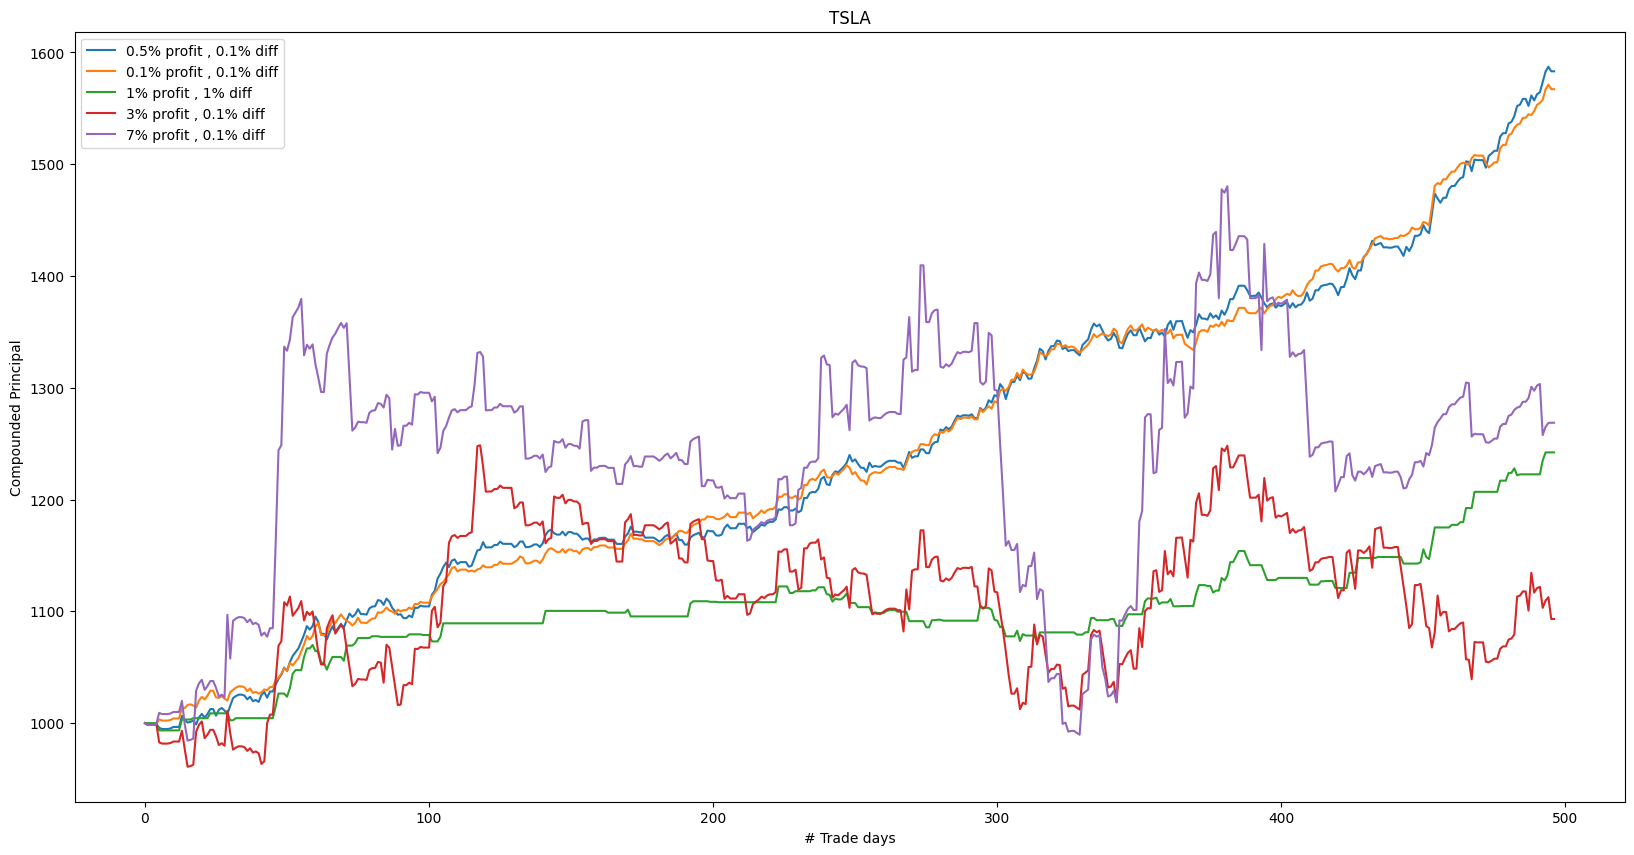

In [110]:
return1 = test(PARAM_GROUP_1, TSLA_minute_data,TSLA_daily_opening_candle, TSLA_daily_closing_candle)
return2 = test(PARAM_GROUP_2, TSLA_minute_data,TSLA_daily_opening_candle, TSLA_daily_closing_candle)
return3 = test(PARAM_GROUP_3, TSLA_minute_data,TSLA_daily_opening_candle, TSLA_daily_closing_candle)
return4 = test(PARAM_GROUP_4, TSLA_minute_data,TSLA_daily_opening_candle, TSLA_daily_closing_candle)
return5 = test(PARAM_GROUP_5, TSLA_minute_data,TSLA_daily_opening_candle, TSLA_daily_closing_candle)
plot_returns([return1, return2, return3, return4, return5], 'TSLA')

# AAPL

Cash in hand:  1231.2813679470692
Number of days traded in 2 years:  390
Cash in hand:  1169.217019978057
Number of days traded in 2 years:  390
Cash in hand:  1055.5896831367731
Number of days traded in 2 years:  57
Cash in hand:  670.1725531797954
Number of days traded in 2 years:  390
Cash in hand:  843.841605985947
Number of days traded in 2 years:  390


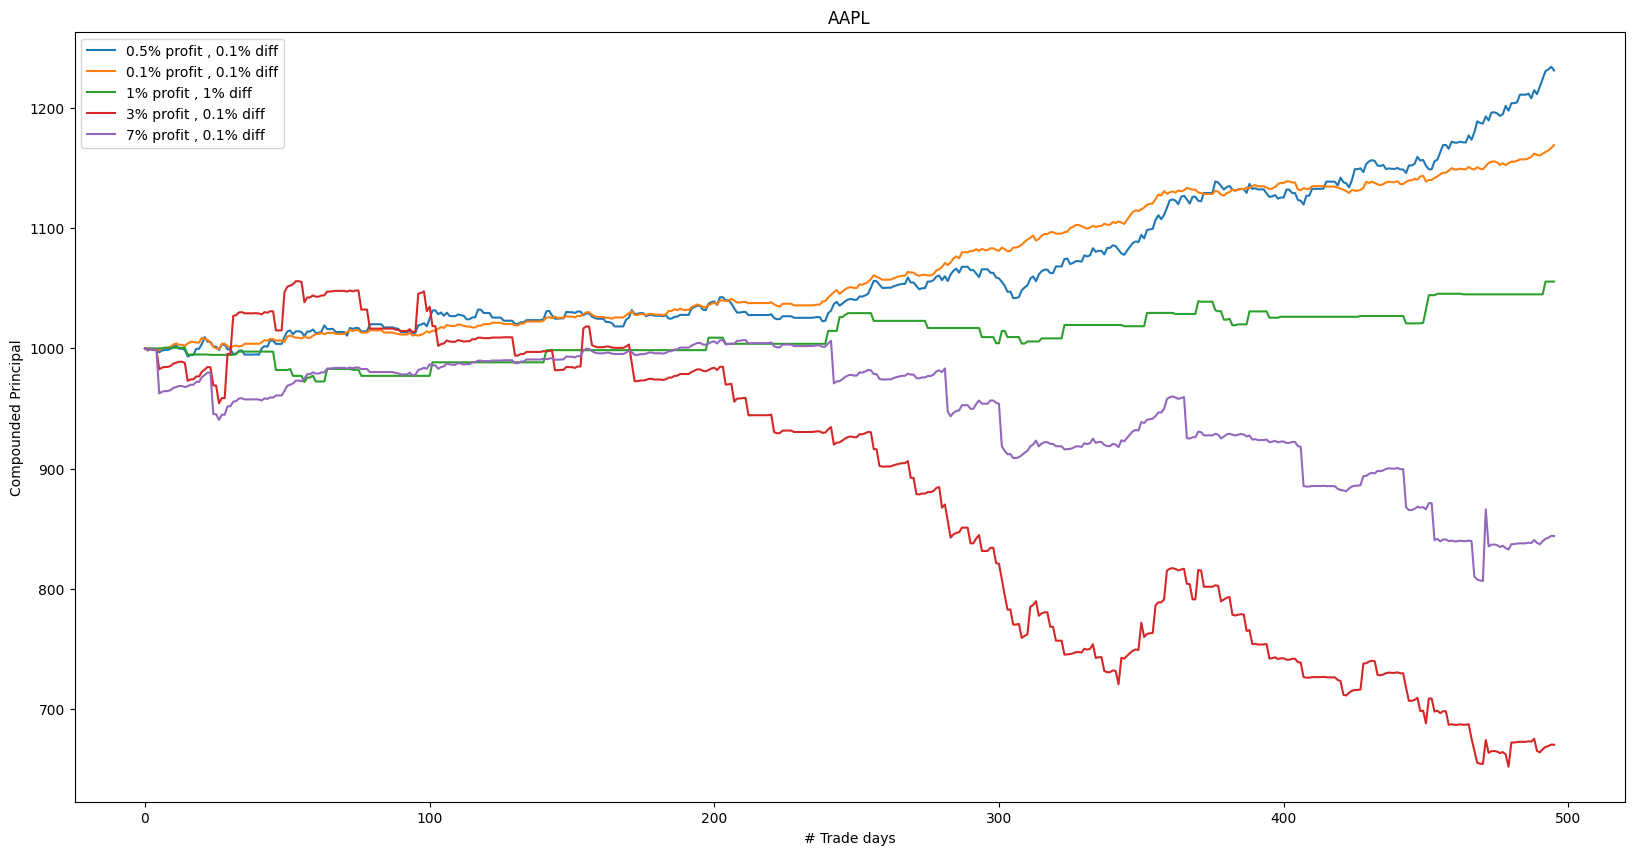

In [111]:
return1 = test(PARAM_GROUP_1, AAPL_minute_data,AAPL_daily_opening_candle, AAPL_daily_closing_candle)
return2 = test(PARAM_GROUP_2, AAPL_minute_data,AAPL_daily_opening_candle, AAPL_daily_closing_candle)
return3 = test(PARAM_GROUP_3, AAPL_minute_data,AAPL_daily_opening_candle, AAPL_daily_closing_candle)
return4 = test(PARAM_GROUP_4, AAPL_minute_data,AAPL_daily_opening_candle, AAPL_daily_closing_candle)
return5 = test(PARAM_GROUP_5, AAPL_minute_data,AAPL_daily_opening_candle, AAPL_daily_closing_candle)
plot_returns([return1, return2, return3, return4, return5], 'AAPL')

# STNG

Cash in hand:  413.72556663082645
Number of days traded in 2 years:  420
Cash in hand:  419.6323903449715
Number of days traded in 2 years:  420
Cash in hand:  396.37295950984594
Number of days traded in 2 years:  213
Cash in hand:  322.706246795299
Number of days traded in 2 years:  420
Cash in hand:  81.80397261231343
Number of days traded in 2 years:  420


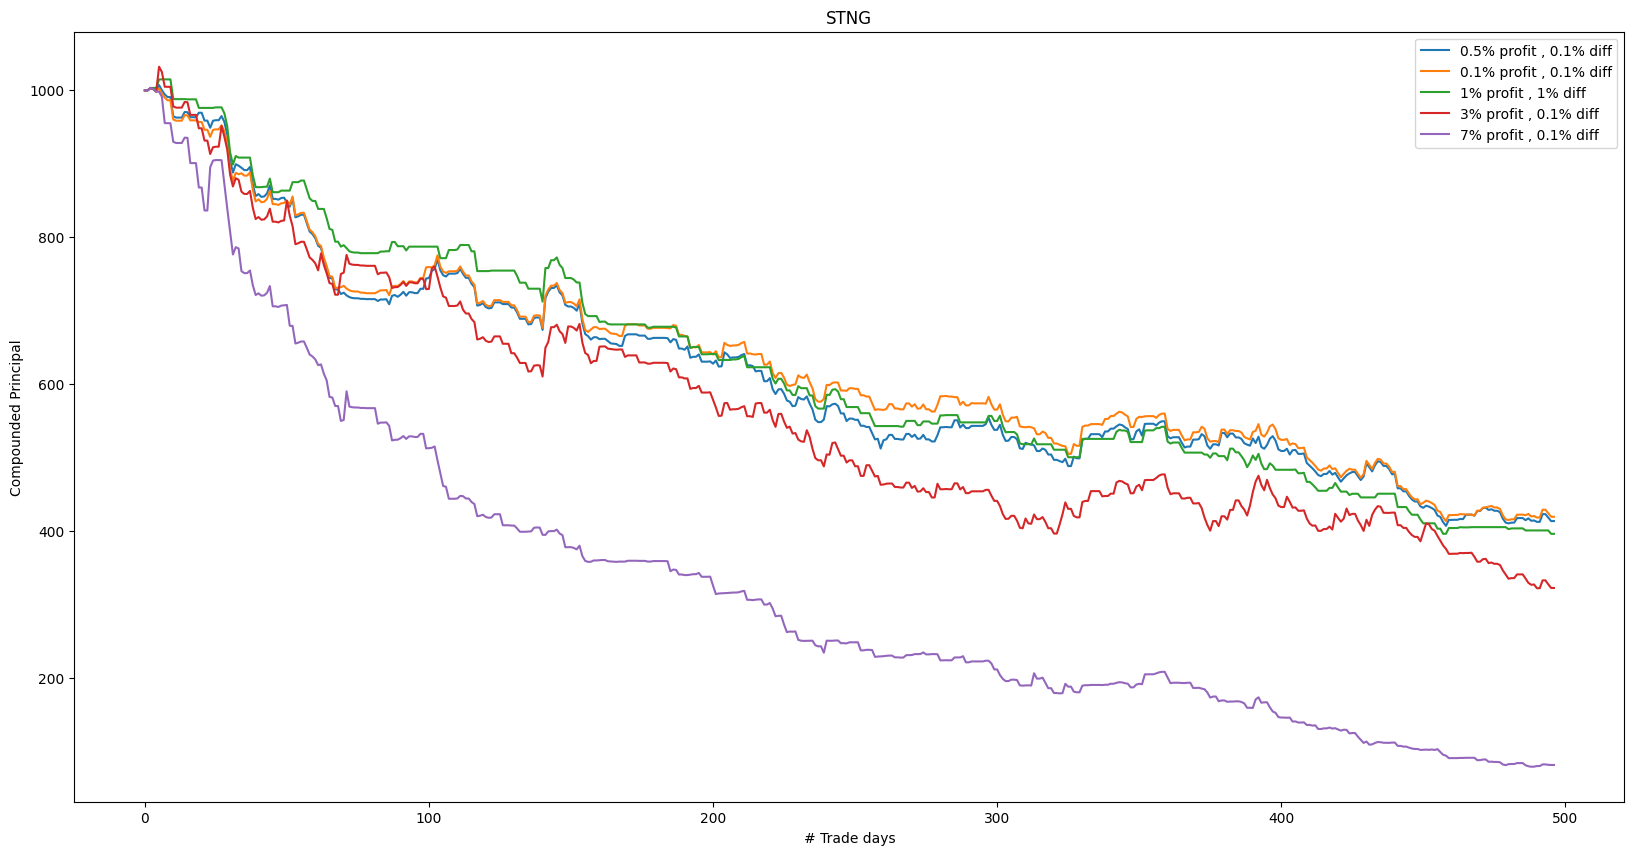

In [112]:
return1 = test(PARAM_GROUP_1, STNG_minute_data,STNG_daily_opening_candle, STNG_daily_closing_candle)
return2 = test(PARAM_GROUP_2, STNG_minute_data,STNG_daily_opening_candle, STNG_daily_closing_candle)
return3 = test(PARAM_GROUP_3, STNG_minute_data,STNG_daily_opening_candle, STNG_daily_closing_candle)
return4 = test(PARAM_GROUP_4, STNG_minute_data,STNG_daily_opening_candle, STNG_daily_closing_candle)
return5 = test(PARAM_GROUP_5, STNG_minute_data,STNG_daily_opening_candle, STNG_daily_closing_candle)
plot_returns([return1, return2, return3, return4, return5], 'STNG')

# SPY

Cash in hand:  1036.3185964369359
Number of days traded in 2 years:  368
Cash in hand:  1052.7603479871166
Number of days traded in 2 years:  368
Cash in hand:  1015.4809630775137
Number of days traded in 2 years:  27
Cash in hand:  838.6960215332248
Number of days traded in 2 years:  368
Cash in hand:  922.6140397344175
Number of days traded in 2 years:  368


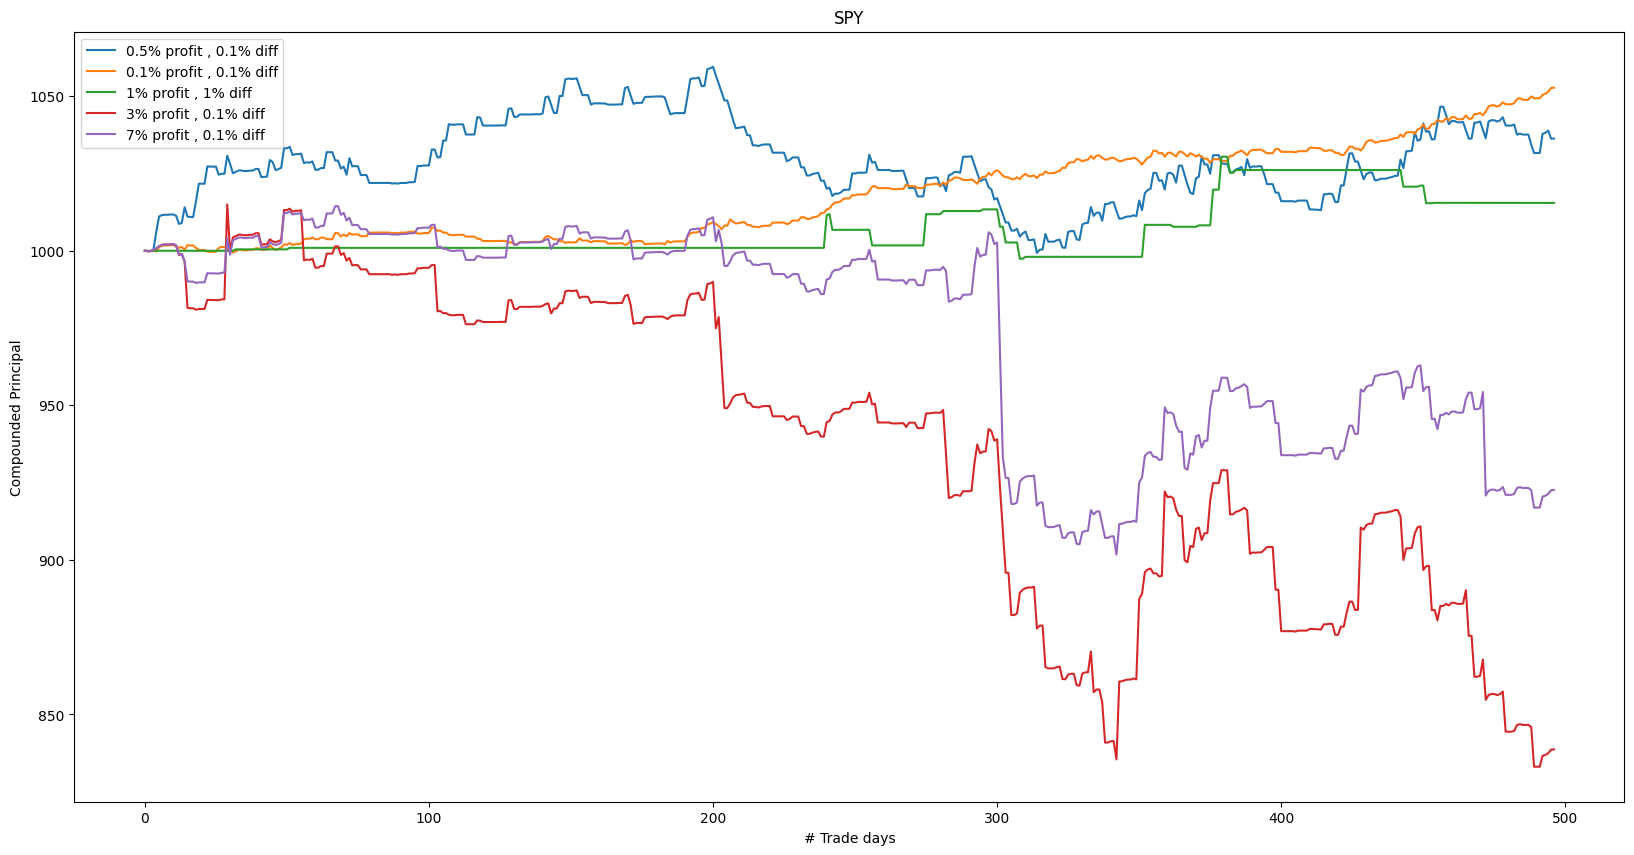

In [113]:
return1 = test(PARAM_GROUP_1, SPY_minute_data,SPY_daily_opening_candle, SPY_daily_closing_candle)
return2 = test(PARAM_GROUP_2, SPY_minute_data,SPY_daily_opening_candle, SPY_daily_closing_candle)
return3 = test(PARAM_GROUP_3, SPY_minute_data,SPY_daily_opening_candle, SPY_daily_closing_candle)
return4 = test(PARAM_GROUP_4, SPY_minute_data,SPY_daily_opening_candle, SPY_daily_closing_candle)
return5 = test(PARAM_GROUP_5, SPY_minute_data,SPY_daily_opening_candle, SPY_daily_closing_candle)
plot_returns([return1, return2, return3, return4, return5], 'SPY')

# AMD

Cash in hand:  1185.8697801588703
Number of days traded in 2 years:  322
Cash in hand:  1231.8648687115362
Number of days traded in 2 years:  322
Cash in hand:  978.9866413108808
Number of days traded in 2 years:  74
Cash in hand:  1071.7157078110922
Number of days traded in 2 years:  322
Cash in hand:  922.9679730939935
Number of days traded in 2 years:  322


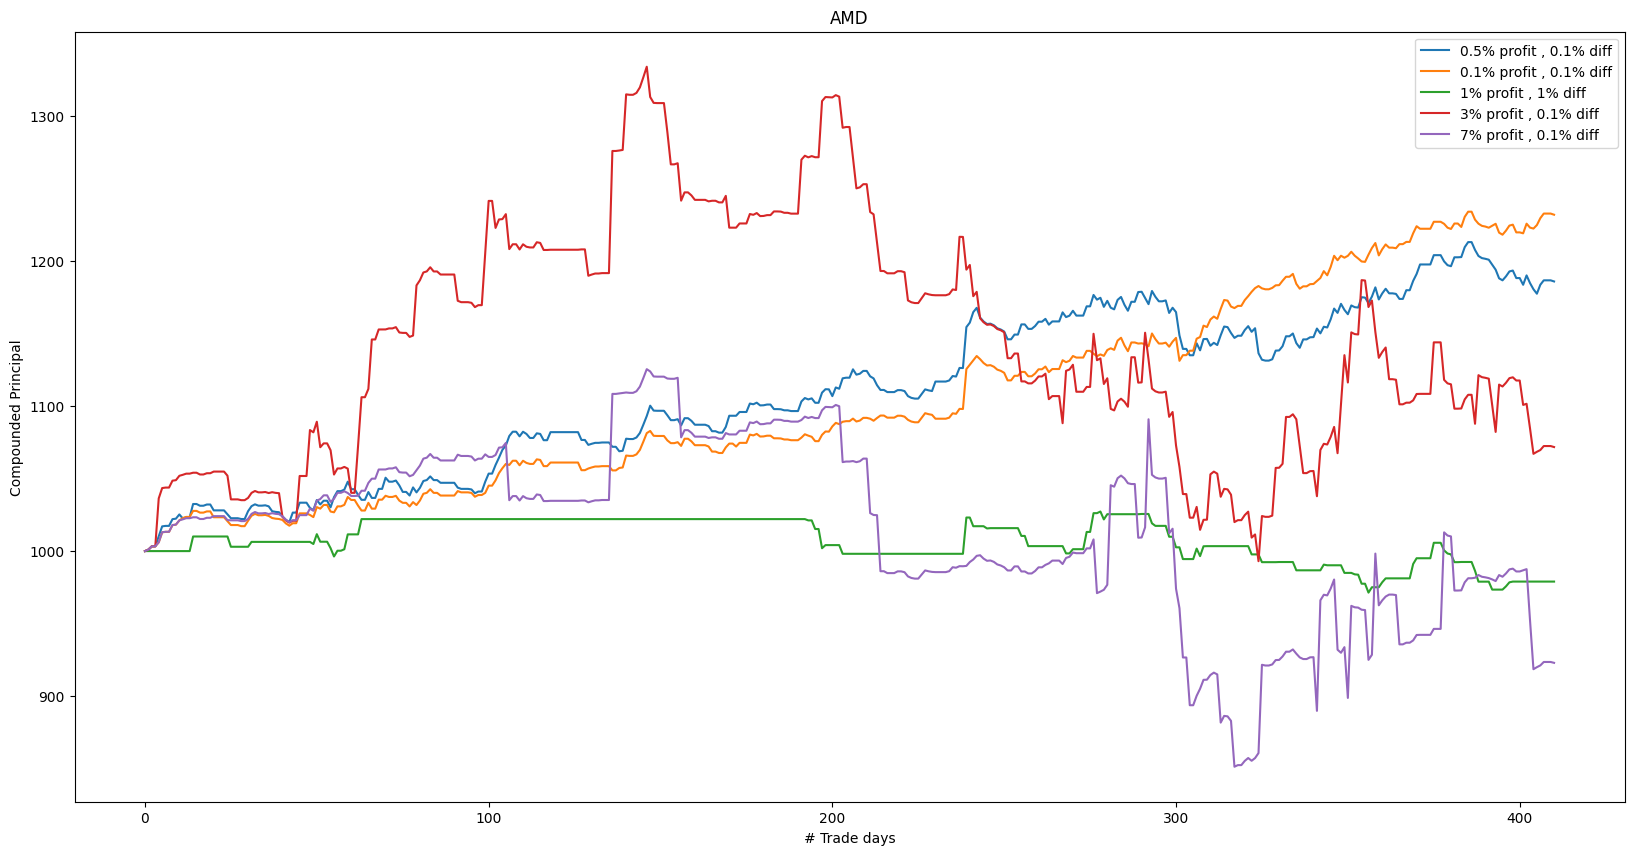

In [114]:
return1 = test(PARAM_GROUP_1, AMD_minute_data,AMD_daily_opening_candle, AMD_daily_closing_candle)
return2 = test(PARAM_GROUP_2, AMD_minute_data,AMD_daily_opening_candle, AMD_daily_closing_candle)
return3 = test(PARAM_GROUP_3, AMD_minute_data,AMD_daily_opening_candle, AMD_daily_closing_candle)
return4 = test(PARAM_GROUP_4, AMD_minute_data,AMD_daily_opening_candle, AMD_daily_closing_candle)
return5 = test(PARAM_GROUP_5, AMD_minute_data,AMD_daily_opening_candle, AMD_daily_closing_candle)
plot_returns([return1, return2, return3, return4, return5], 'AMD')

# AMZN

Cash in hand:  1047.7037795140957
Number of days traded in 2 years:  427
Cash in hand:  1060.3898922217186
Number of days traded in 2 years:  427
Cash in hand:  929.4274798180563
Number of days traded in 2 years:  56
Cash in hand:  1578.3326507344955
Number of days traded in 2 years:  427
Cash in hand:  827.5192684684829
Number of days traded in 2 years:  427


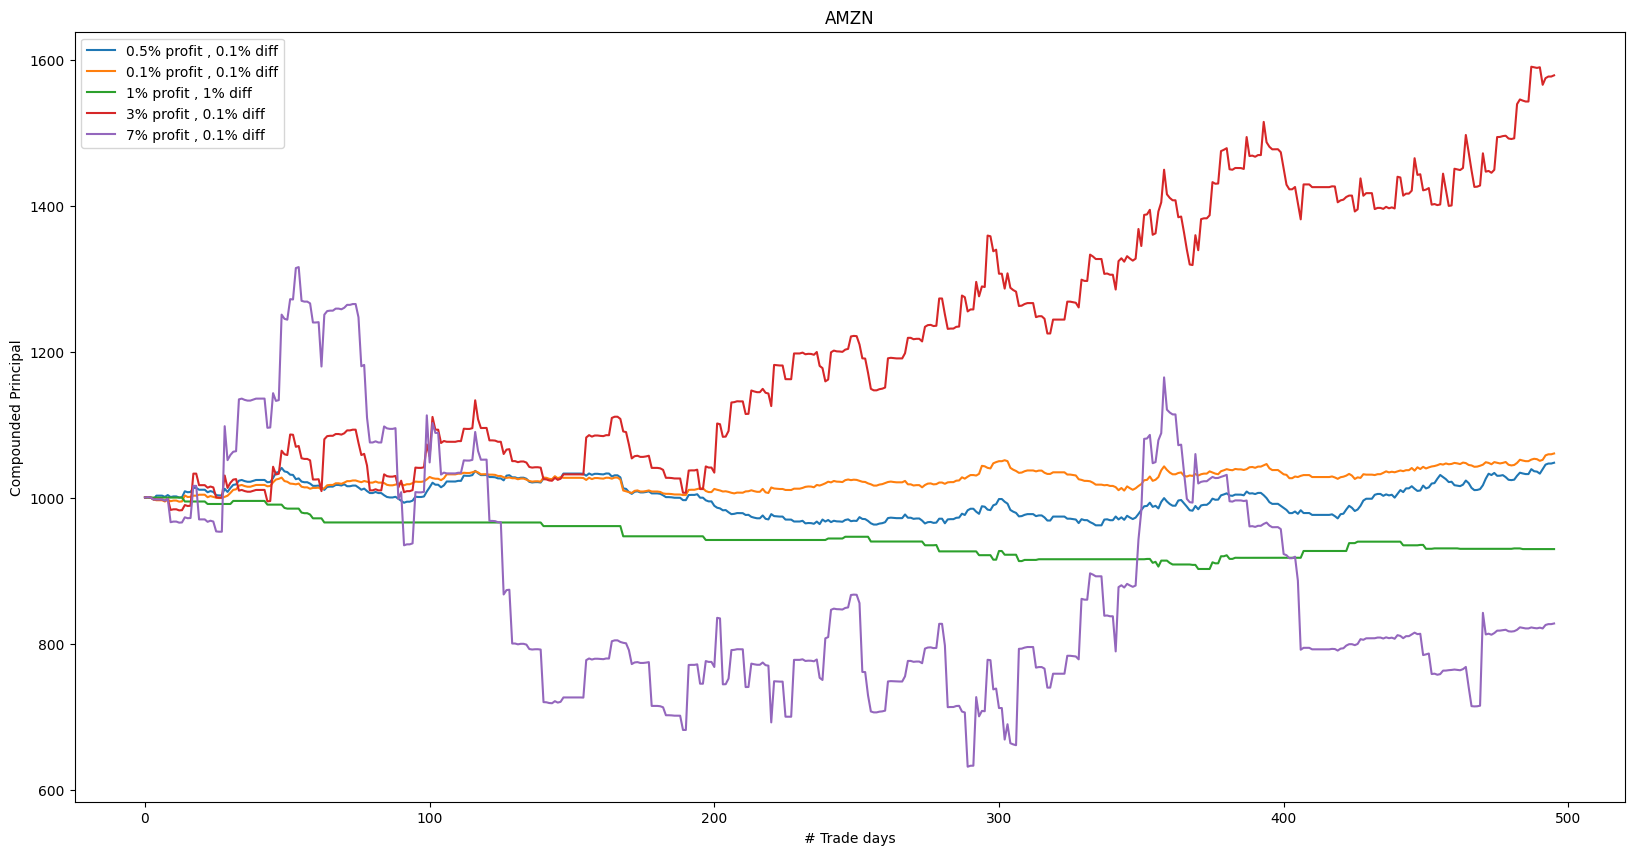

In [115]:
return1 = test(PARAM_GROUP_1, AMZN_minute_data,AMZN_daily_opening_candle, AMZN_daily_closing_candle)
return2 = test(PARAM_GROUP_2, AMZN_minute_data,AMZN_daily_opening_candle, AMZN_daily_closing_candle)
return3 = test(PARAM_GROUP_3, AMZN_minute_data,AMZN_daily_opening_candle, AMZN_daily_closing_candle)
return4 = test(PARAM_GROUP_4, AMZN_minute_data,AMZN_daily_opening_candle, AMZN_daily_closing_candle)
return5 = test(PARAM_GROUP_5, AMZN_minute_data,AMZN_daily_opening_candle, AMZN_daily_closing_candle)
plot_returns([return1, return2, return3, return4, return5], 'AMZN')

# CLFD

Cash in hand:  412.7461218835383
Number of days traded in 2 years:  370
Cash in hand:  428.95967623550774
Number of days traded in 2 years:  370
Cash in hand:  400.44803122471166
Number of days traded in 2 years:  187
Cash in hand:  375.1376128106534
Number of days traded in 2 years:  370
Cash in hand:  153.10314817704324
Number of days traded in 2 years:  370


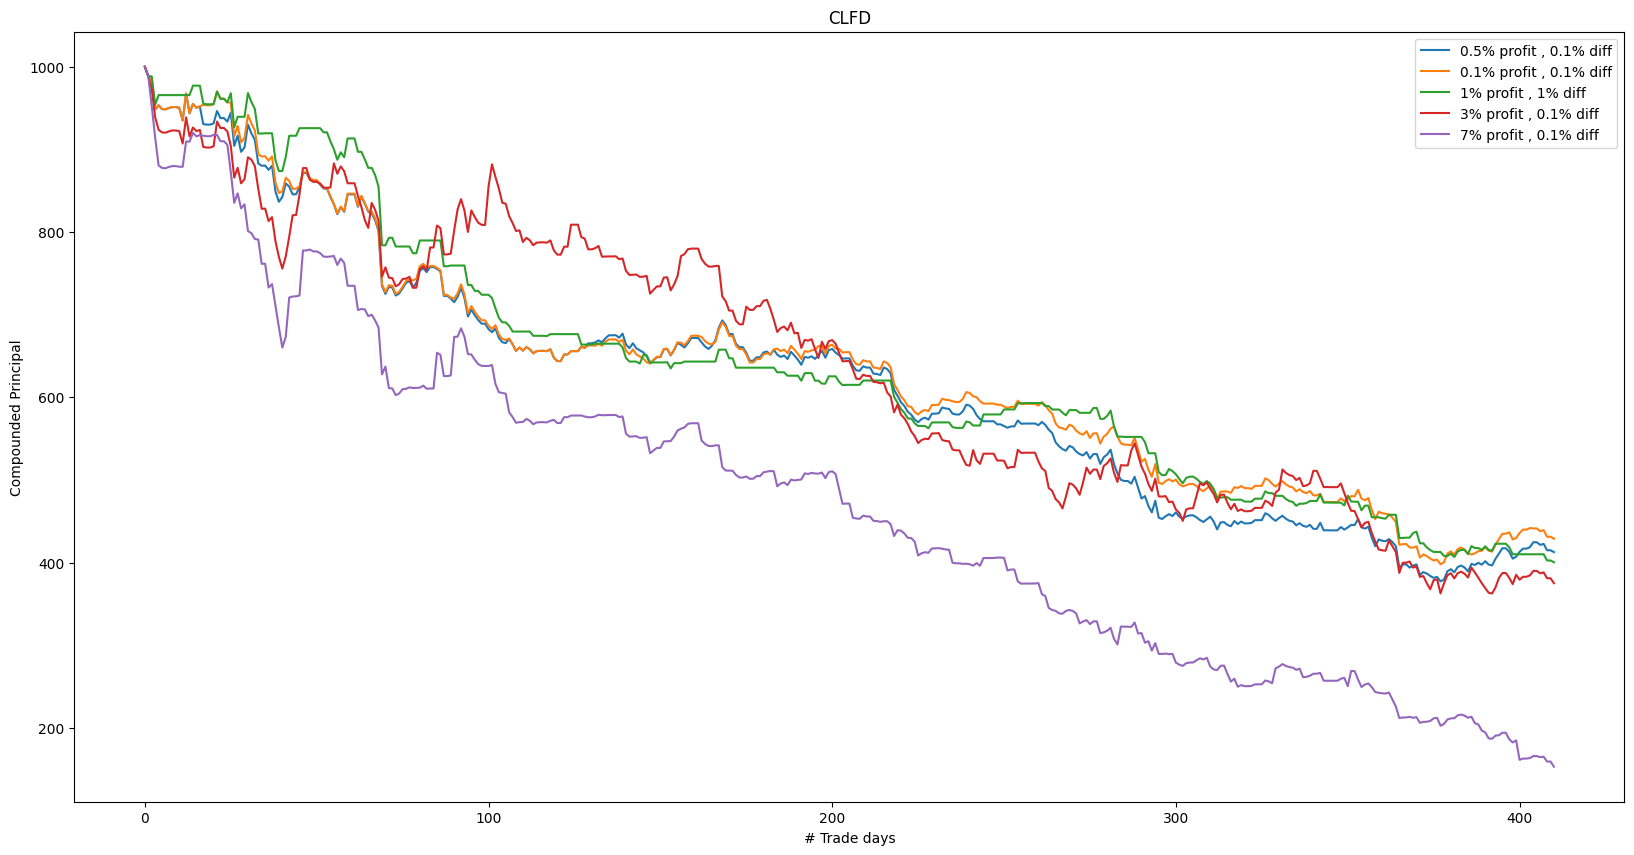

In [116]:
return1 = test(PARAM_GROUP_1, CLFD_minute_data,CLFD_daily_opening_candle, CLFD_daily_closing_candle)
return2 = test(PARAM_GROUP_2, CLFD_minute_data,CLFD_daily_opening_candle, CLFD_daily_closing_candle)
return3 = test(PARAM_GROUP_3, CLFD_minute_data,CLFD_daily_opening_candle, CLFD_daily_closing_candle)
return4 = test(PARAM_GROUP_4, CLFD_minute_data,CLFD_daily_opening_candle, CLFD_daily_closing_candle)
return5 = test(PARAM_GROUP_5, CLFD_minute_data,CLFD_daily_opening_candle, CLFD_daily_closing_candle)
plot_returns([return1, return2, return3, return4, return5], 'CLFD')

# META


Cash in hand:  940.674126020886
Number of days traded in 2 years:  151
Cash in hand:  931.3659500251739
Number of days traded in 2 years:  151
Cash in hand:  940.4682599815825
Number of days traded in 2 years:  47
Cash in hand:  875.0762203098355
Number of days traded in 2 years:  151
Cash in hand:  775.8692698887365
Number of days traded in 2 years:  151


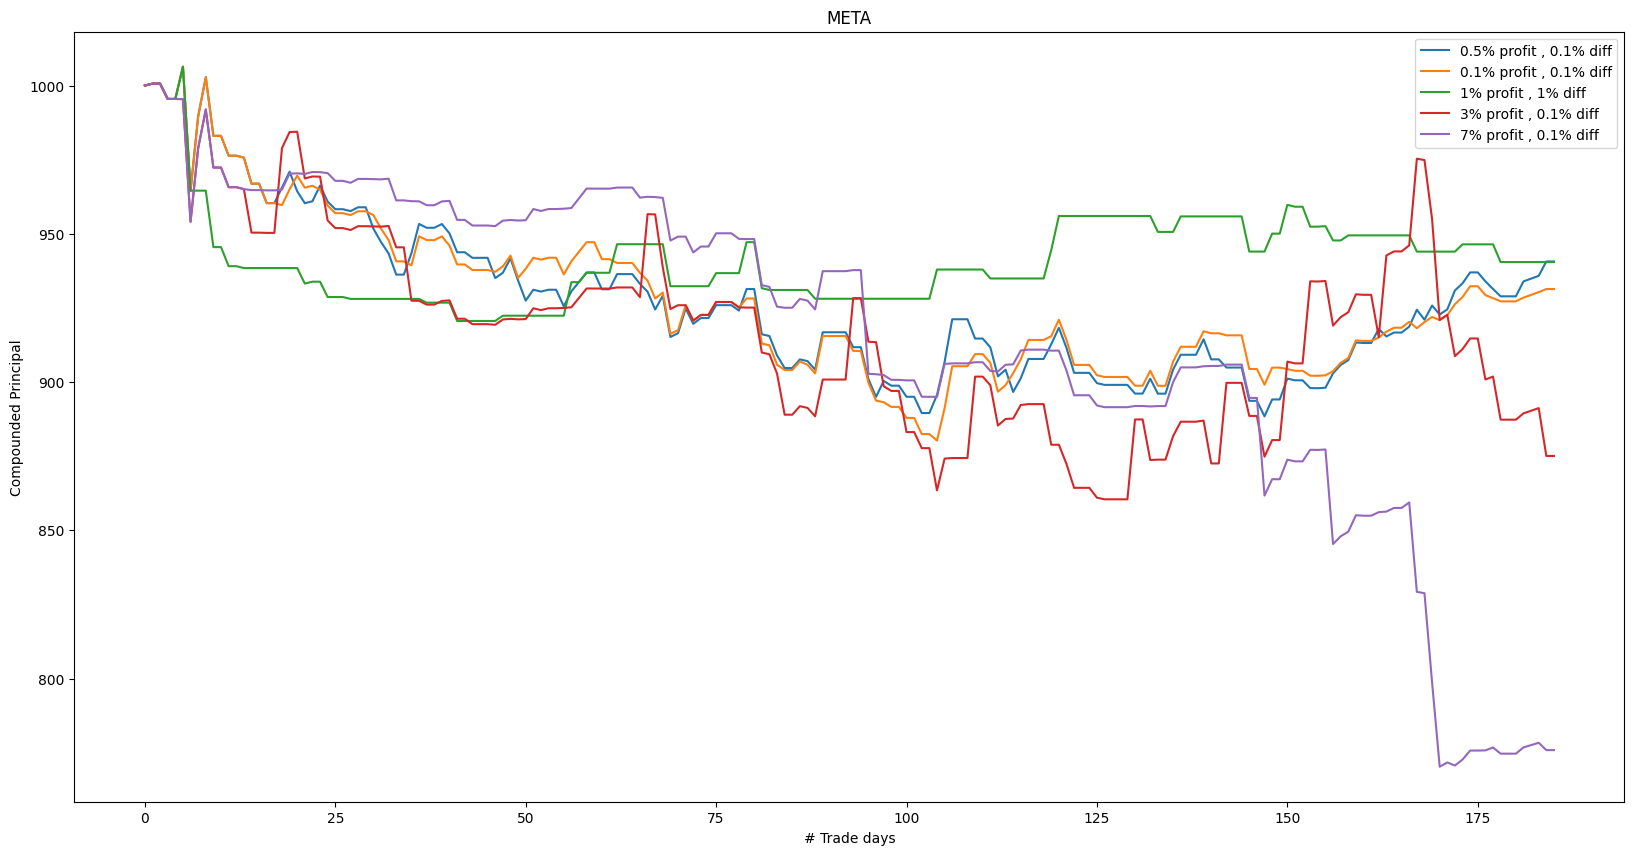

In [117]:
return1 = test(PARAM_GROUP_1, META_minute_data,META_daily_opening_candle, META_daily_closing_candle)
return2 = test(PARAM_GROUP_2, META_minute_data,META_daily_opening_candle, META_daily_closing_candle)
return3 = test(PARAM_GROUP_3, META_minute_data,META_daily_opening_candle, META_daily_closing_candle)
return4 = test(PARAM_GROUP_4, META_minute_data,META_daily_opening_candle, META_daily_closing_candle)
return5 = test(PARAM_GROUP_5, META_minute_data,META_daily_opening_candle, META_daily_closing_candle)
plot_returns([return1, return2, return3, return4, return5], 'META')

# NVDA


Cash in hand:  1341.3244668389054
Number of days traded in 2 years:  366
Cash in hand:  1224.6409844594357
Number of days traded in 2 years:  366
Cash in hand:  1113.707840543896
Number of days traded in 2 years:  90
Cash in hand:  1229.4020627767331
Number of days traded in 2 years:  366
Cash in hand:  767.435066838035
Number of days traded in 2 years:  366


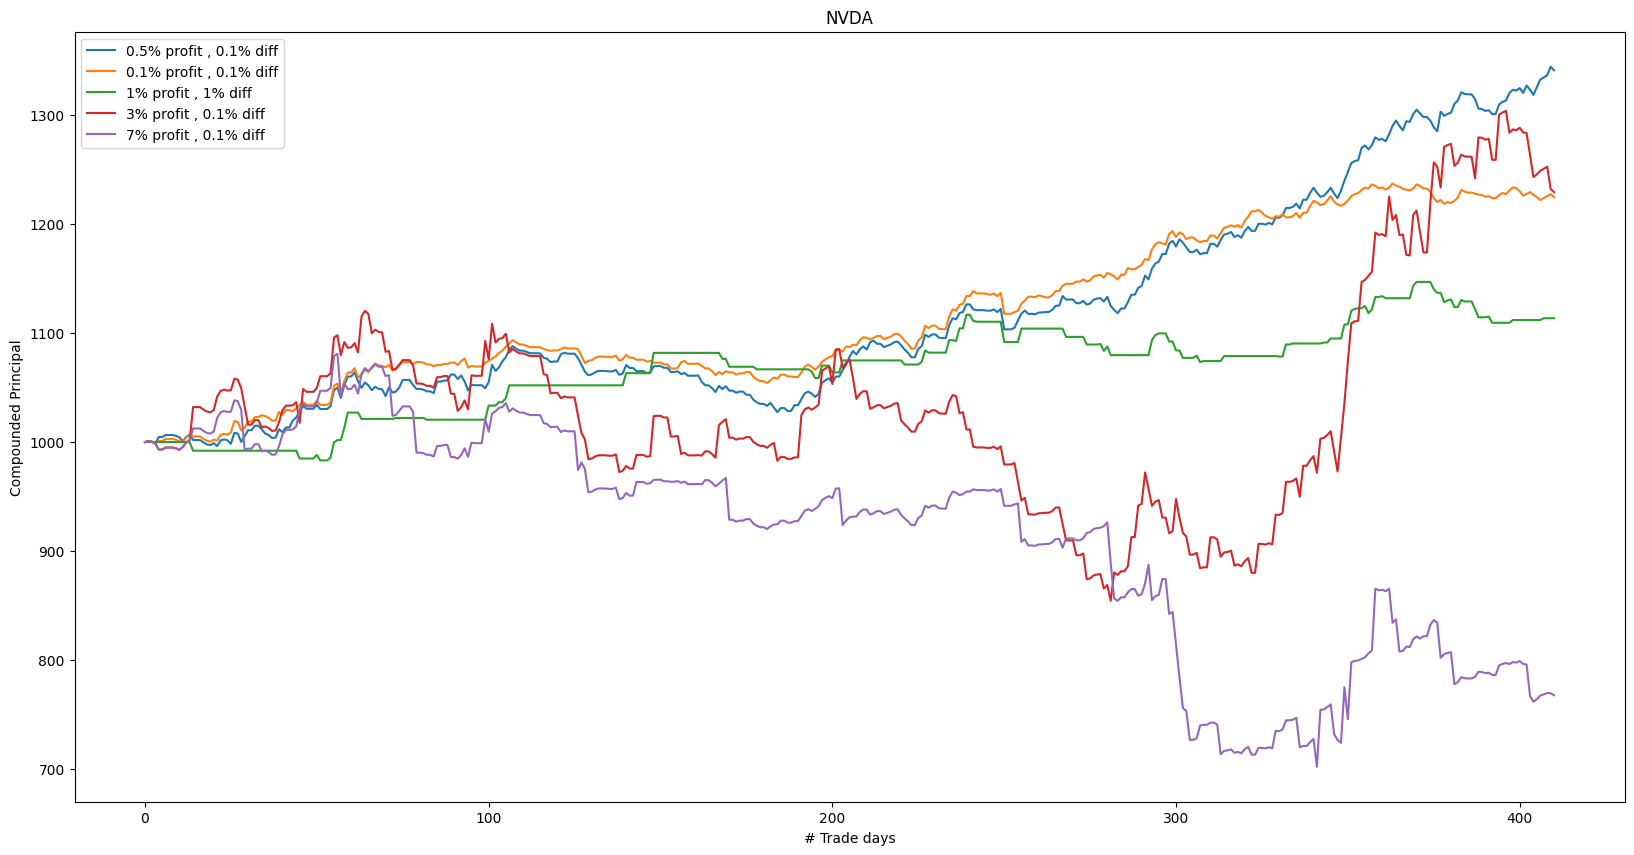

In [118]:
return1 = test(PARAM_GROUP_1, NVDA_minute_data,NVDA_daily_opening_candle, NVDA_daily_closing_candle)
return2 = test(PARAM_GROUP_2, NVDA_minute_data,NVDA_daily_opening_candle, NVDA_daily_closing_candle)
return3 = test(PARAM_GROUP_3, NVDA_minute_data,NVDA_daily_opening_candle, NVDA_daily_closing_candle)
return4 = test(PARAM_GROUP_4, NVDA_minute_data,NVDA_daily_opening_candle, NVDA_daily_closing_candle)
return5 = test(PARAM_GROUP_5, NVDA_minute_data,NVDA_daily_opening_candle, NVDA_daily_closing_candle)
plot_returns([return1, return2, return3, return4, return5], 'NVDA')

# PG

Cash in hand:  738.2274989803575
Number of days traded in 2 years:  305
Cash in hand:  773.313367730186
Number of days traded in 2 years:  305
Cash in hand:  915.2507084846563
Number of days traded in 2 years:  15
Cash in hand:  689.5674867612081
Number of days traded in 2 years:  305
Cash in hand:  846.8995221364573
Number of days traded in 2 years:  305


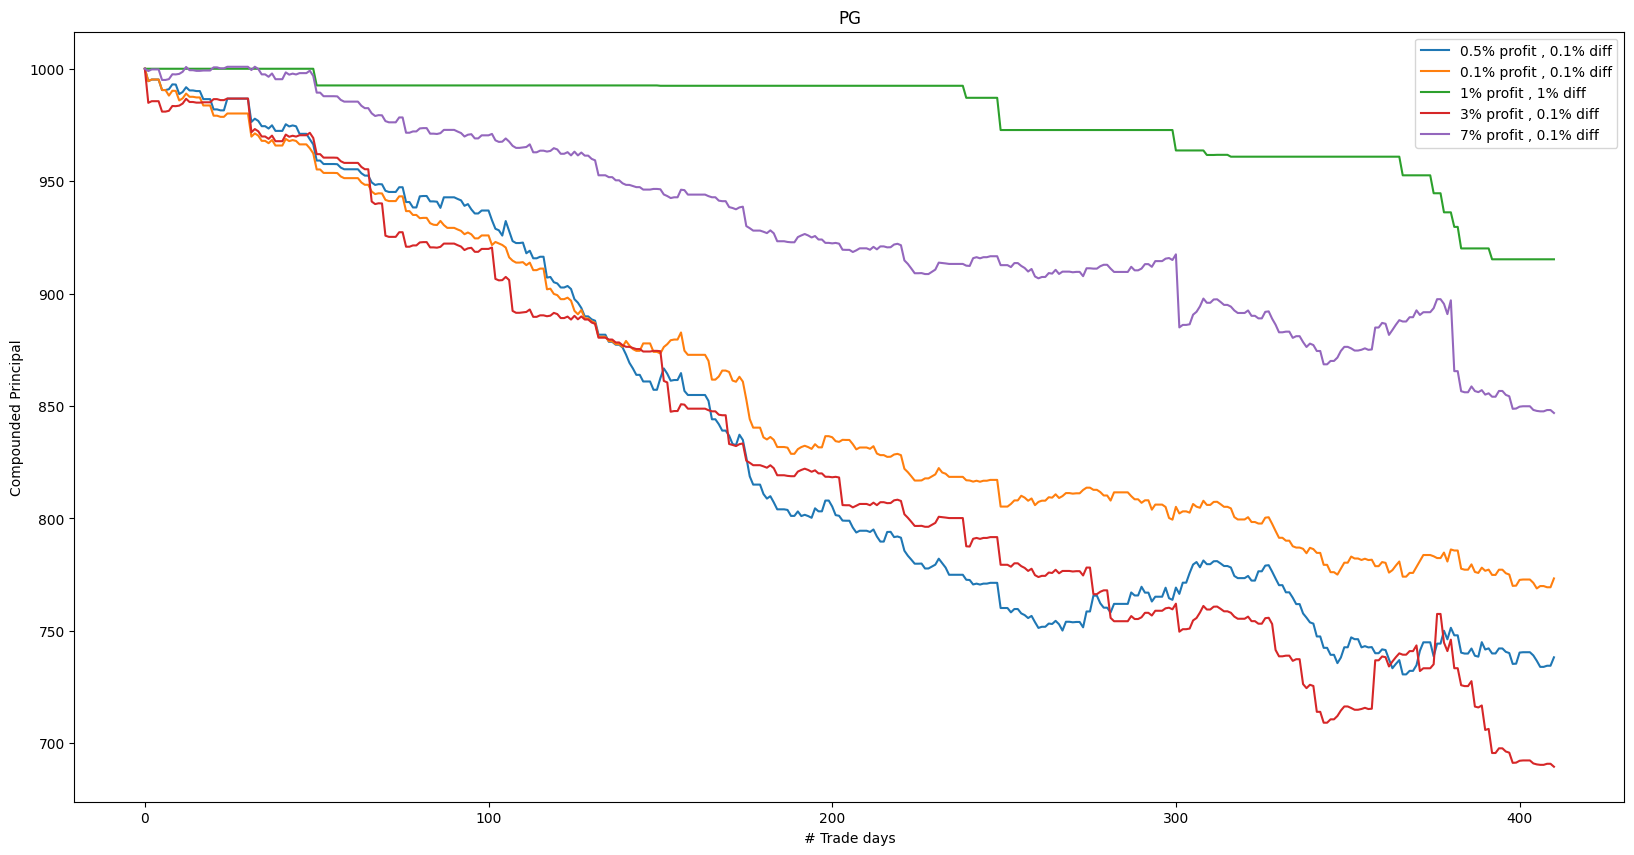

In [119]:
return1 = test(PARAM_GROUP_1, PG_minute_data,PG_daily_opening_candle, PG_daily_closing_candle)
return2 = test(PARAM_GROUP_2, PG_minute_data,PG_daily_opening_candle, PG_daily_closing_candle)
return3 = test(PARAM_GROUP_3, PG_minute_data,PG_daily_opening_candle, PG_daily_closing_candle)
return4 = test(PARAM_GROUP_4, PG_minute_data,PG_daily_opening_candle, PG_daily_closing_candle)
return5 = test(PARAM_GROUP_5, PG_minute_data,PG_daily_opening_candle, PG_daily_closing_candle)
plot_returns([return1, return2, return3, return4, return5], 'PG')

# SBUX

Cash in hand:  753.1453087478226
Number of days traded in 2 years:  353
Cash in hand:  787.0335631740194
Number of days traded in 2 years:  353
Cash in hand:  896.1147592591326
Number of days traded in 2 years:  38
Cash in hand:  608.2812593672036
Number of days traded in 2 years:  353
Cash in hand:  607.6306567928273
Number of days traded in 2 years:  353


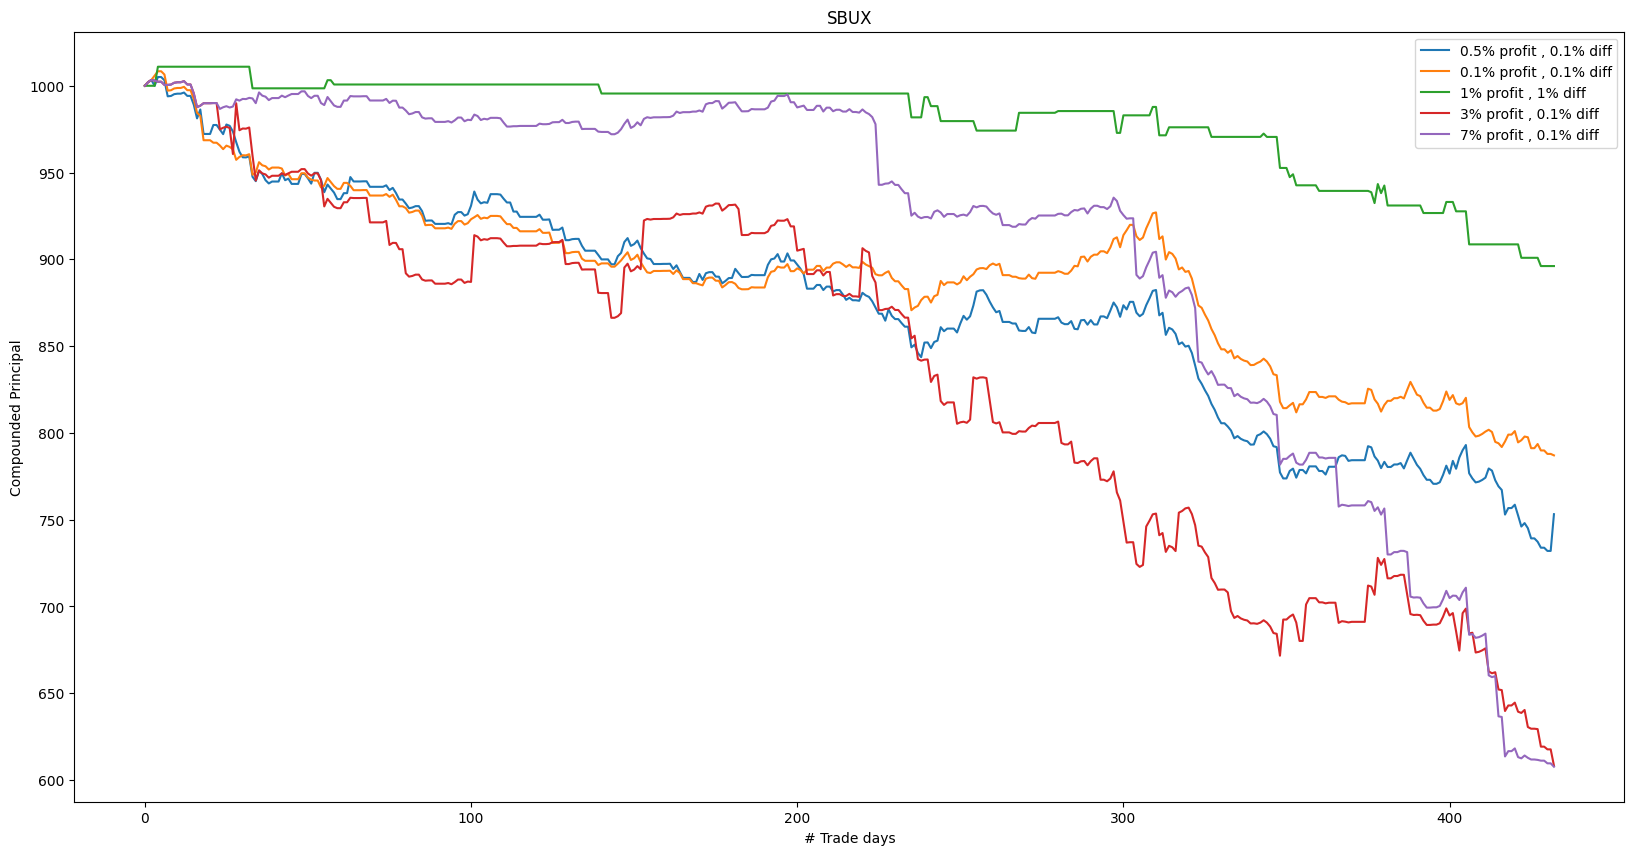

In [120]:
return1 = test(PARAM_GROUP_1, SBUX_minute_data,SBUX_daily_opening_candle, SBUX_daily_closing_candle)
return2 = test(PARAM_GROUP_2, SBUX_minute_data,SBUX_daily_opening_candle, SBUX_daily_closing_candle)
return3 = test(PARAM_GROUP_3, SBUX_minute_data,SBUX_daily_opening_candle, SBUX_daily_closing_candle)
return4 = test(PARAM_GROUP_4, SBUX_minute_data,SBUX_daily_opening_candle, SBUX_daily_closing_candle)
return5 = test(PARAM_GROUP_5, SBUX_minute_data,SBUX_daily_opening_candle, SBUX_daily_closing_candle)
plot_returns([return1, return2, return3, return4, return5], 'SBUX')

# SHOP

Cash in hand:  898.5812430067913
Number of days traded in 2 years:  377
Cash in hand:  836.2977535886106
Number of days traded in 2 years:  377
Cash in hand:  909.9040983564163
Number of days traded in 2 years:  114
Cash in hand:  1212.9004484366903
Number of days traded in 2 years:  377
Cash in hand:  1544.3973240285206
Number of days traded in 2 years:  377


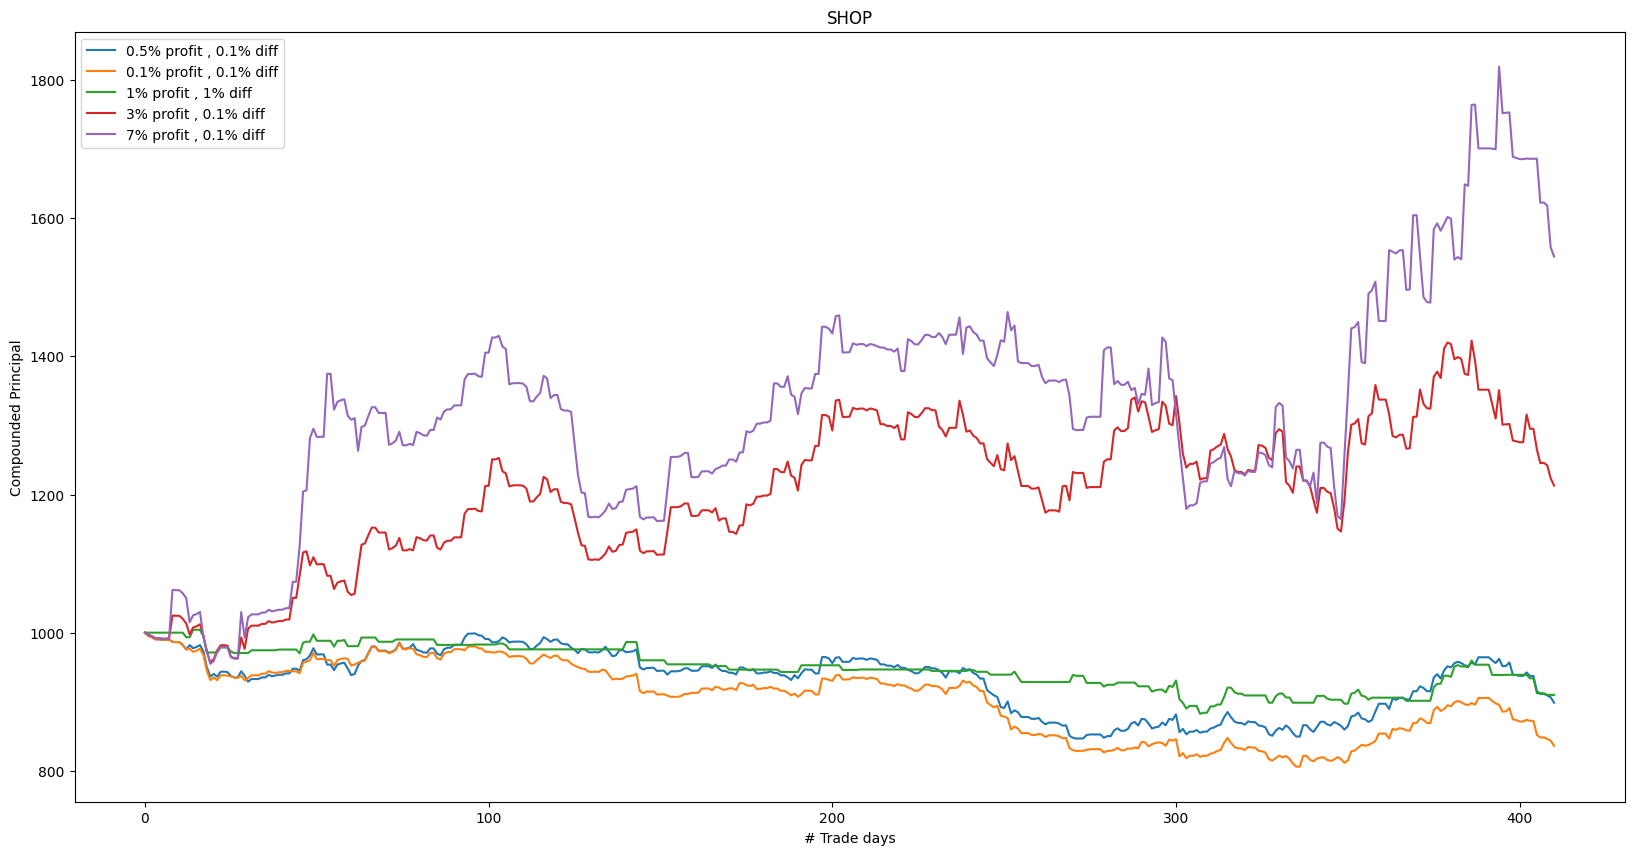

In [121]:
return1 = test(PARAM_GROUP_1, SHOP_minute_data,SHOP_daily_opening_candle, SHOP_daily_closing_candle)
return2 = test(PARAM_GROUP_2, SHOP_minute_data,SHOP_daily_opening_candle, SHOP_daily_closing_candle)
return3 = test(PARAM_GROUP_3, SHOP_minute_data,SHOP_daily_opening_candle, SHOP_daily_closing_candle)
return4 = test(PARAM_GROUP_4, SHOP_minute_data,SHOP_daily_opening_candle, SHOP_daily_closing_candle)
return5 = test(PARAM_GROUP_5, SHOP_minute_data,SHOP_daily_opening_candle, SHOP_daily_closing_candle)
plot_returns([return1, return2, return3, return4, return5], 'SHOP')